# SimHash performance evaluation

## Software specifications

All test were done running the following programs (found below). Operation system Ubuntu 14.04 LTS 64 bit.

  Software  | Version | Link
  ------------- | -------------
  Ubuntu 64 bit | 14.04 LTS | http://www.ubuntu.com/
  blast+ local | 2.3.0+ | https://blast.ncbi.nlm.nih.gov/Blast.cgi?PAGE_TYPE=BlastDocs&DOC_TYPE=Download
  Simhash (C++) | 0.0.1 | None

  

## Hardware specifications

All tests and results were gain on PC with the specifications listed below.

  Hardware  | Specification
  ------------- | -------------
  CPU  | Intel(R) Core(TM) i5-4690K CPU @ 3.50 GHz
  Graphics card  | EVGA GeForce GTX 760
  Memory  | DDR3 8GB 1600 MHz
  HDD| Segagate 3 SATA TB/TO, 64MB Cache, 7200 RPM
  
  
  Graphic card details  | Specification
  ------------- | -------------
  CUDA cores  | 1152
  Base Clock  | 980 MHz
  Boost Clock  | 1033 MHz
  Memory  | 2048 MB GDDR5
  Memory Clock  | 6008 MHz
  Memory Bandwitch  | 192.2GB/s
  
  Hardware  | Cost (Amazon.com)
  ------------- | -------------
  Graphic card  | \$189.99
  CPU  | \$234.46 

## Initialise libraries

In [1]:
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns
import math
from decimal import Decimal
import numpy as np

## Load the results

In [2]:
simhash_ENSP233_spooky_3 = pa.read_csv('../blast_comparison/ENSP233/ENSP233_Spooky_3_compare.csv')
simhash_ENSP233_native_3 = pa.read_csv('../blast_comparison/ENSP233/ENSP233_Native_3_compare.csv')

simhash_ENSP233_boost_2 = pa.read_csv('../blast_comparison/ENSP233/ENSP233_Boost_2_compare.csv')
simhash_ENSP233_boost_3 = pa.read_csv('../blast_comparison/ENSP233/ENSP233_Boost_3_compare.csv', dtype={'eValue':'double'})
simhash_ENSP233_boost_4 = pa.read_csv('../blast_comparison/ENSP233/ENSP233_Boost_4_compare.csv')
simhash_ENSP233_boost_5 = pa.read_csv('../blast_comparison/ENSP233/ENSP233_Boost_5_compare.csv')

simhash_ENSP233_boost = pa.concat(
    [simhash_ENSP233_boost_2, simhash_ENSP233_boost_3, simhash_ENSP233_boost_4, simhash_ENSP233_boost_5])

simhash_ENSP233_window_3 = pa.concat(
    [simhash_ENSP233_spooky_3, simhash_ENSP233_native_3, simhash_ENSP233_boost_3])

simhash_ENSP1008_boost_3 = pa.read_csv('../blast_comparison/ENSP1008/ENSP1008_Boost_3_compare.csv', dtype={'eValue':'double'})
simhash_ENSP1146_boost_3 = pa.read_csv('../blast_comparison/ENSP1146/ENSP1146_Boost_3_compare.csv', dtype={'eValue':'double'})

simhash_all_boost_3 = pa.concat([simhash_ENSP233_boost_3, simhash_ENSP1008_boost_3, simhash_ENSP1146_boost_3])

In [3]:
simhash_ENSP1146_boost_3.head()

,window_size,hash,ham_distance,similarity,error,blast_output,bitscore,eValue
0,3,Boost,11,82.8125,14.8475,97.66,1022.0,0.0
1,3,Boost,10,84.3750,12.8950,97.27,1018.0,0.0
2,3,Boost,10,84.3750,12.8950,97.27,1018.0,0.0
3,3,Boost,10,84.3750,12.6950,97.07,1016.0,0.0
4,3,Boost,9,85.9375,11.1325,97.07,1016.0,0.0


## Data manipulation

In [4]:
logit = lambda x: -math.log10(x) if x != 0 else 0.0

In [5]:
simhash_ENSP233_boost_3['eValueLog'] = simhash_ENSP233_boost_3['eValue'].apply(logit)
simhash_ENSP1008_boost_3['eValueLog'] = simhash_ENSP1008_boost_3['eValue'].apply(logit)
simhash_ENSP1146_boost_3['eValueLog'] = simhash_ENSP1146_boost_3['eValue'].apply(logit)
simhash_all_boost_3['eValueLog'] = simhash_all_boost_3['eValue'].apply(logit)

## Date exploration

In [6]:
# Plot all graphs inside the notebook
%matplotlib inline

simhash_ENSP233_boost_3.head()

,window_size,hash,ham_distance,similarity,error,blast_output,bitscore,eValue,eValueLog
0,3,Boost,0,100.0,0.0,100.0,374.0,4.000000e-130,129.39794
1,3,Boost,0,100.0,0.0,100.0,374.0,4.000000e-130,129.39794
2,3,Boost,0,100.0,0.0,100.0,374.0,4.000000e-130,129.39794
3,3,Boost,0,100.0,0.0,100.0,374.0,4.000000e-130,129.39794
4,3,Boost,0,100.0,0.0,100.0,374.0,4.000000e-130,129.39794


In [7]:
simhash_ENSP233_boost_3.tail()

,window_size,hash,ham_distance,similarity,error,blast_output,bitscore,eValue,eValueLog
32528,3,Boost,29,54.6875,29.4875,25.20,47.0,0.001,3.0
32529,3,Boost,27,57.8125,29.6925,28.12,47.4,0.001,3.0
32530,3,Boost,30,53.1250,25.7850,27.34,47.4,0.001,3.0
32531,3,Boost,37,42.1875,18.4075,23.78,47.4,0.001,3.0
32532,3,Boost,32,50.0000,17.3700,32.63,45.4,0.001,3.0


## Performance

In [8]:
# Configure crahps
sns.set(font_scale=1.2)
sns.set(style="ticks")

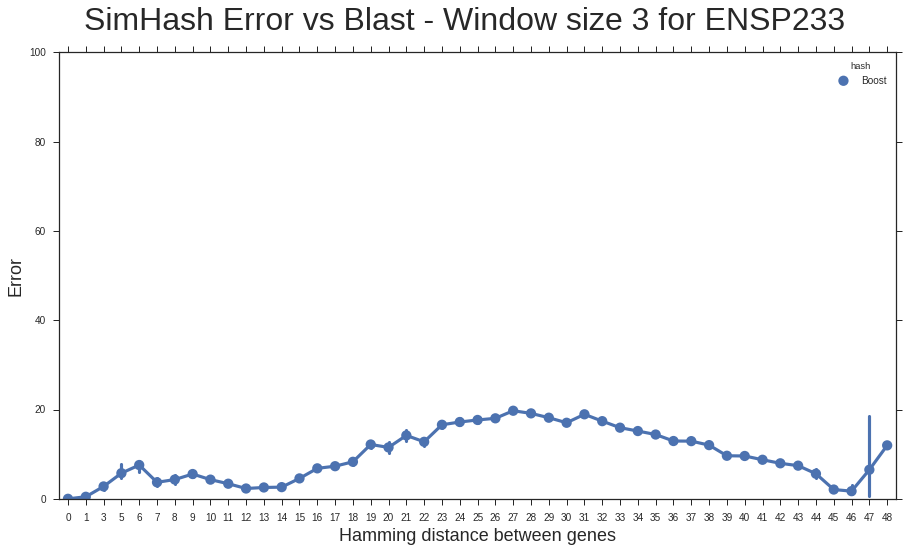

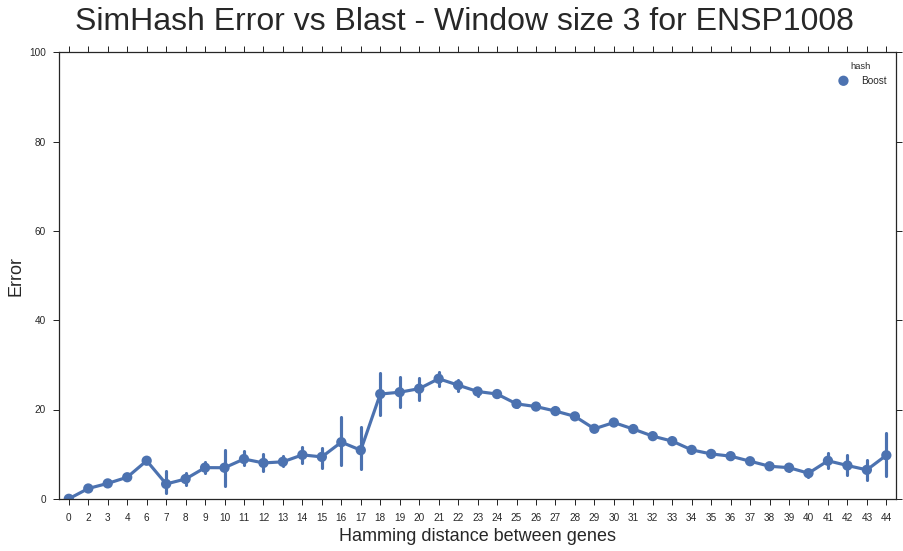

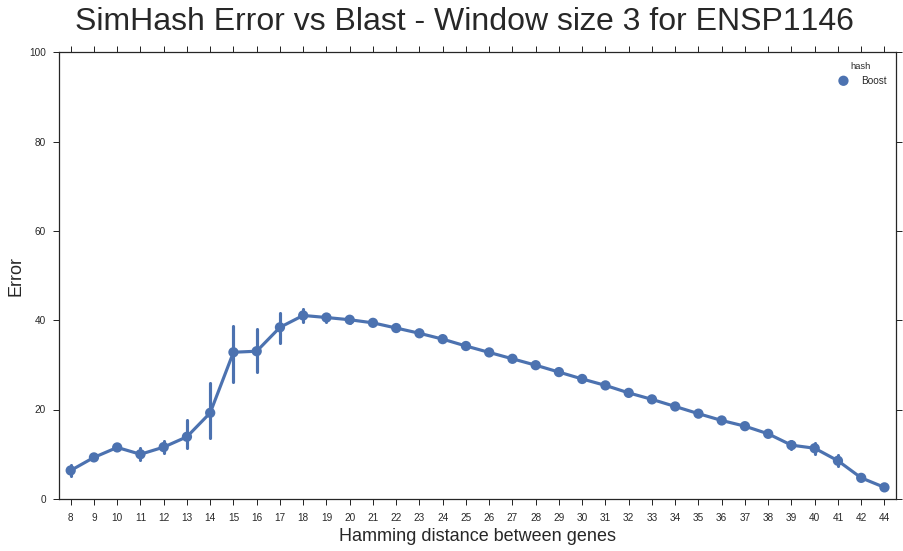

In [9]:
plt.figure(figsize=(15,8))
sns.pointplot(x="ham_distance", y="error", hue="hash", data=simhash_ENSP233_boost_3,size=30, aspect=2)
plt.ylabel('Error', fontsize=18)
plt.xlabel('Hamming distance between genes', fontsize=18)
plt.suptitle("SimHash Error vs Blast - Window size 3 for ENSP233", fontsize = 32)
plt.ylim(0.0,100.0)
plt.savefig("SimHash Error vs Blast - Window size 3 for ENSP233.png")

plt.figure(figsize=(15,8))
sns.pointplot(x="ham_distance", y="error", hue="hash", data=simhash_ENSP1008_boost_3,size=30, aspect=2)
plt.ylabel('Error', fontsize=18)
plt.xlabel('Hamming distance between genes', fontsize=18)
plt.suptitle("SimHash Error vs Blast - Window size 3 for ENSP1008", fontsize = 32)
plt.ylim(0.0,100.0)
plt.savefig("SimHash Error vs Blast - Window size 3 for ENSP1008.png")

plt.figure(figsize=(15,8))
sns.pointplot(x="ham_distance", y="error", hue="hash", data=simhash_ENSP1146_boost_3,size=30, aspect=2)
plt.ylabel('Error', fontsize=18)
plt.xlabel('Hamming distance between genes', fontsize=18)
plt.suptitle("SimHash Error vs Blast - Window size 3 for ENSP1146", fontsize = 32)
plt.ylim(0.0,100.0)
plt.savefig("SimHash Error vs Blast - Window size 3 for ENSP1146.png")

## SimHash sliding window evalution

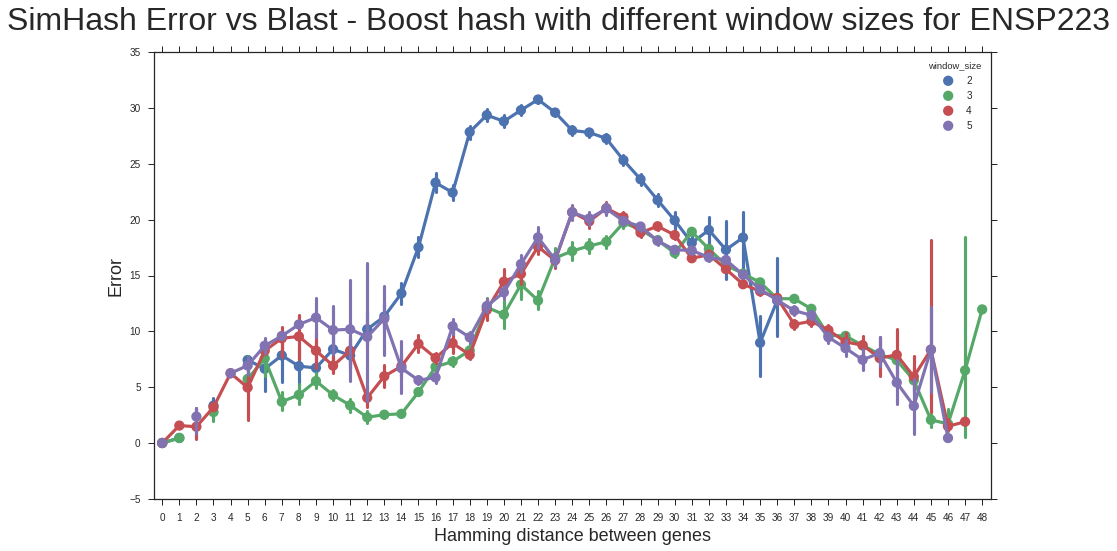

In [10]:
plt.figure(figsize=(15,8))
sns.pointplot(x="ham_distance", y="error", hue="window_size", data=simhash_ENSP233_boost,size=30, aspect=2)
plt.ylabel('Error', fontsize=18)
plt.xlabel('Hamming distance between genes', fontsize=18)
plt.suptitle("SimHash Error vs Blast - Boost hash with different window sizes for ENSP223", fontsize = 32)
#plt.ylim(0.0,100.0)
plt.savefig("SimHash Error vs Blast - Boost hash with different window sizes for ENSP223")

## SimHash hash function evaluation

Hash functions Spooky and Boost give the same results, which can be seen from the graph.

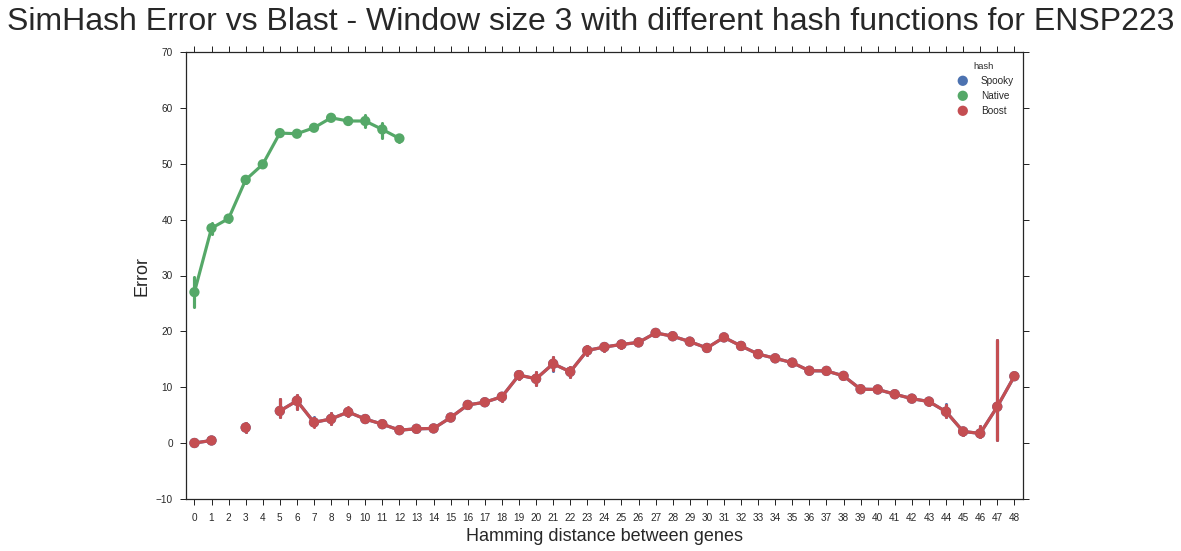

In [11]:
plt.figure(figsize=(15,8))
sns.pointplot(x="ham_distance", y="error", hue="hash", data=simhash_ENSP233_window_3,size=30, aspect=2)
plt.ylabel('Error', fontsize=18)
plt.xlabel('Hamming distance between genes', fontsize=18)
plt.suptitle("SimHash Error vs Blast - Window size 3 with different hash functions for ENSP223", fontsize = 32)
#plt.ylim(0.0,100.0)
plt.savefig("SimHash Error vs Blast - Window size 3 with different hash functions for ENSP223")

## Corelation - Identitiy score, no BOSUM

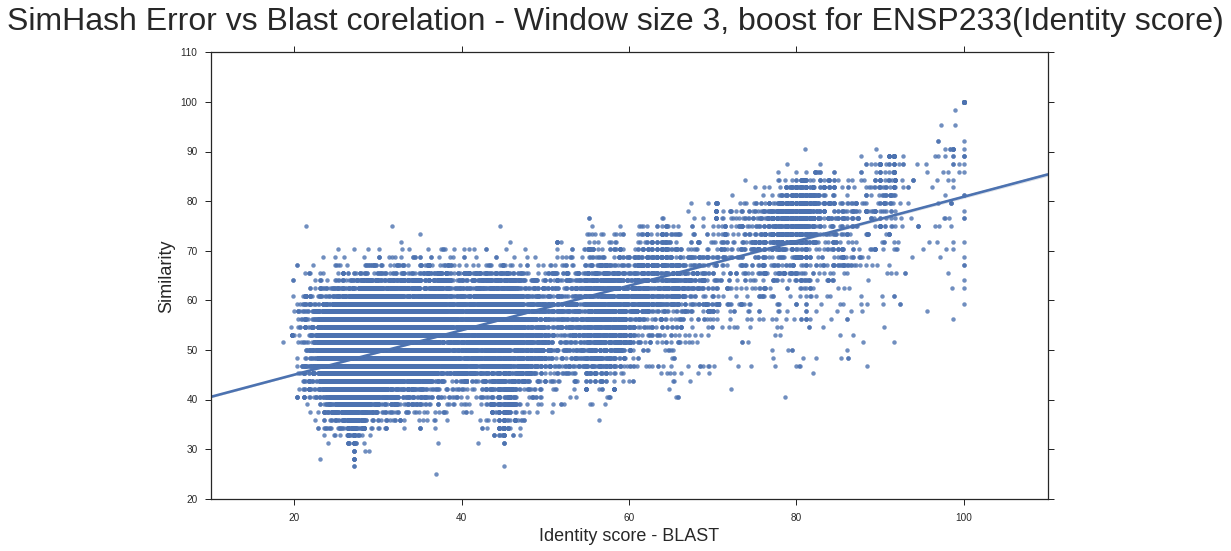

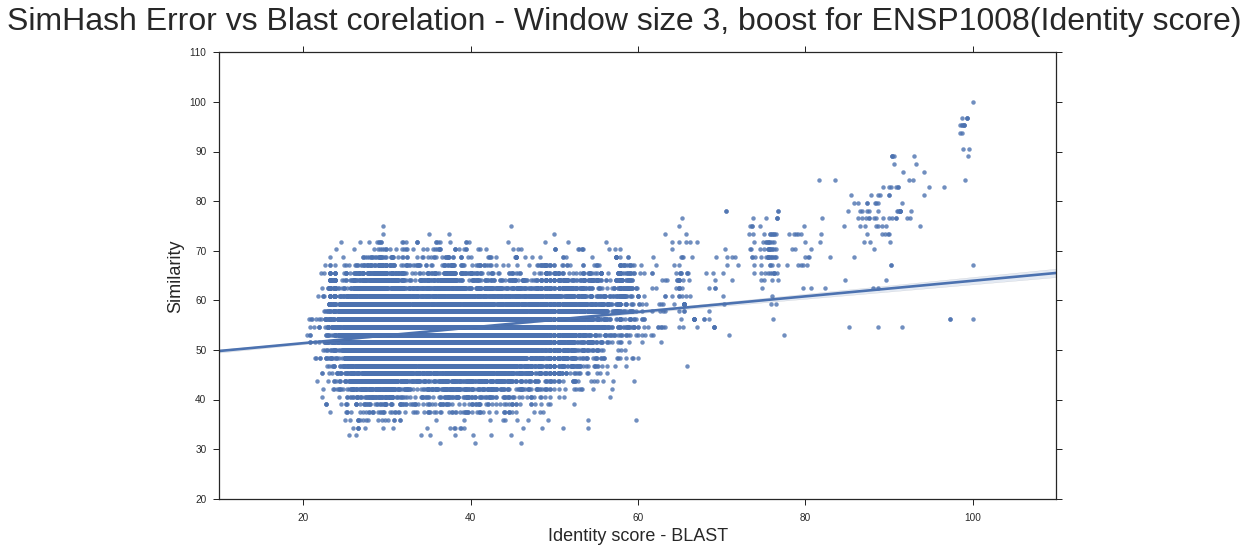

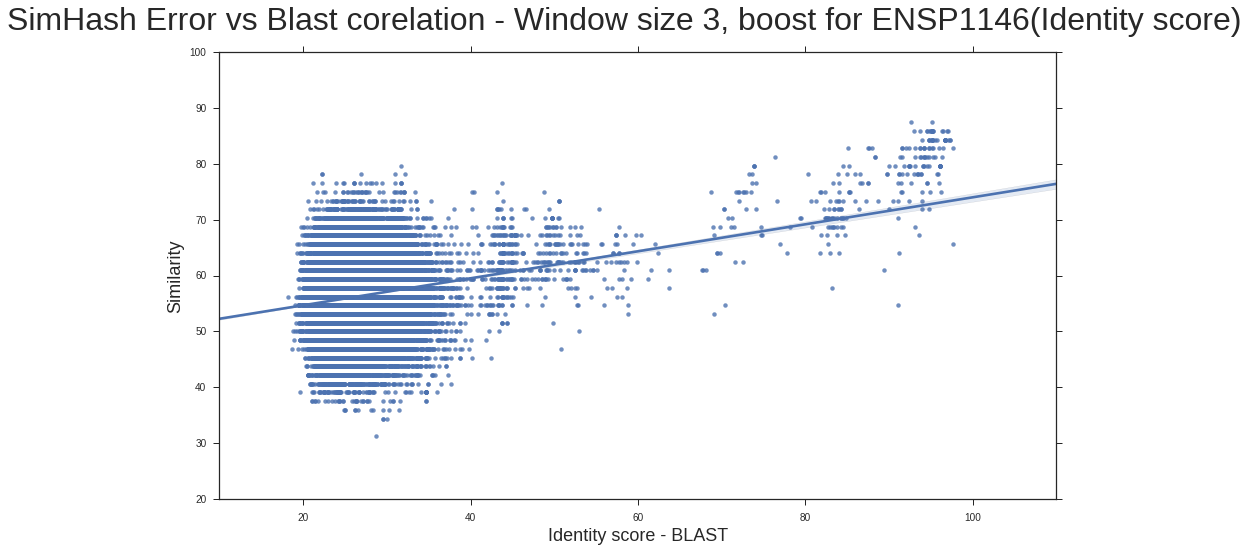

In [19]:
plt.figure(figsize=(15,8))
sns.regplot(x="blast_output", y="similarity",data=simhash_ENSP233_boost_3)
plt.xlabel('Identity score - BLAST', fontsize=18)
plt.ylabel('Similarity', fontsize=18)
plt.suptitle("SimHash Error vs Blast corelation - Window size 3, boost for ENSP233(Identity score)", fontsize = 32)
plt.savefig("SimHash Error vs Blast corelation - Window size 3, boost for ENSP233(Identity score).png")

plt.figure(figsize=(15,8))
sns.regplot(x="blast_output", y="similarity",data=simhash_ENSP1008_boost_3)
plt.xlabel('Identity score - BLAST', fontsize=18)
plt.ylabel('Similarity', fontsize=18)
plt.suptitle("SimHash Error vs Blast corelation - Window size 3, boost for ENSP1008(Identity score)", fontsize = 32)
plt.savefig("SimHash Error vs Blast corelation - Window size 3, boost for ENSP1008(Identity score).png")

plt.figure(figsize=(15,8))
sns.regplot(x="blast_output", y="similarity",data=simhash_ENSP1146_boost_3)
plt.xlabel('Identity score - BLAST', fontsize=18)
plt.ylabel('Similarity', fontsize=18)
plt.suptitle("SimHash Error vs Blast corelation - Window size 3, boost for ENSP1146(Identity score)", fontsize = 32)
plt.savefig("SimHash Error vs Blast corelation - Window size 3, boost for ENSP1146(Identity score).png")

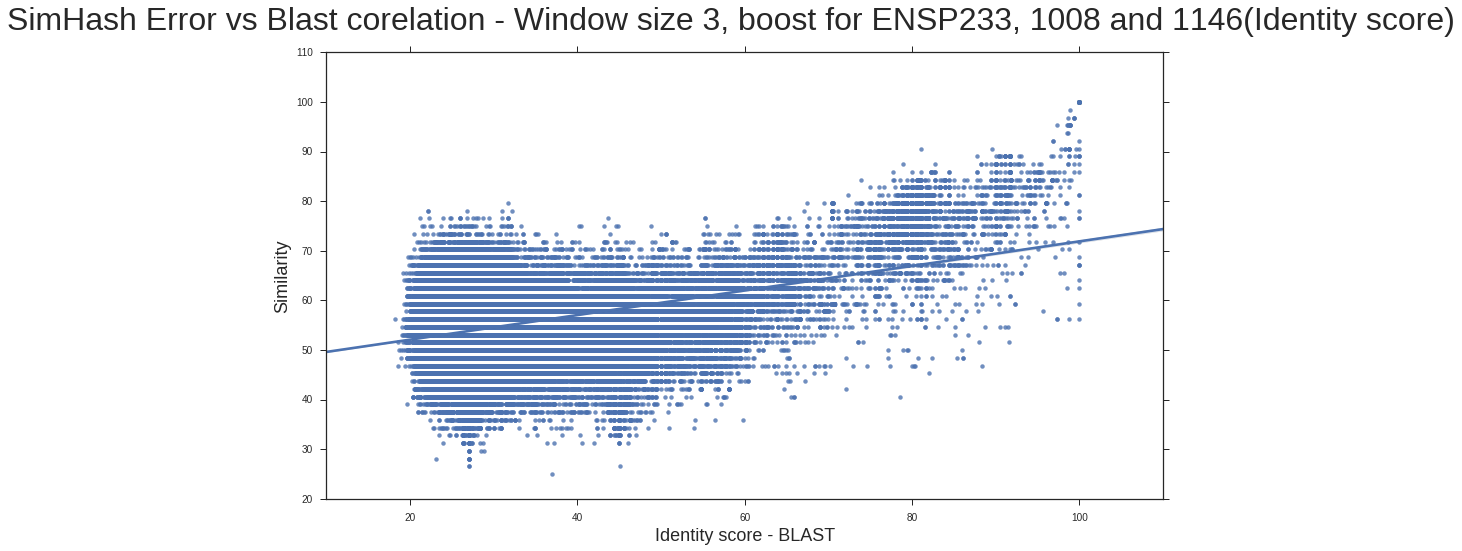

In [20]:
plt.figure(figsize=(15,8))
sns.regplot(x="blast_output", y="similarity",data=simhash_all_boost_3)
plt.xlabel('Identity score - BLAST', fontsize=18)
plt.ylabel('Similarity', fontsize=18)
plt.suptitle("SimHash Error vs Blast corelation - Window size 3, boost for ENSP233, 1008 and 1146(Identity score)", fontsize = 32)
plt.savefig("SimHash Error vs Blast corelation - Window size 3, boost for ENSP233, 1008 and 1146(Identity score).png")

## Corelation - Bitscore, no BOSUM

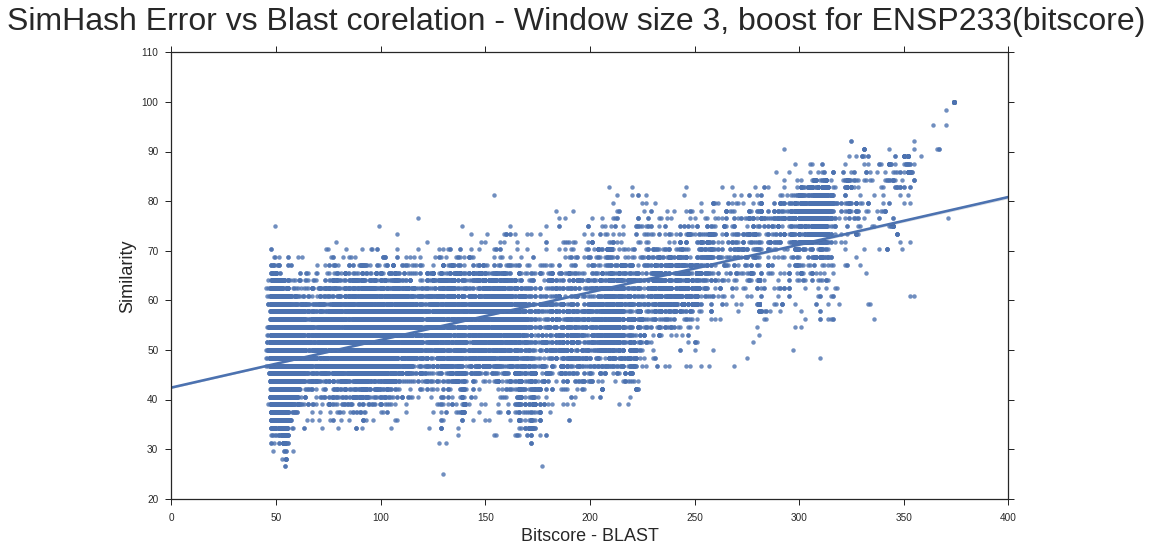

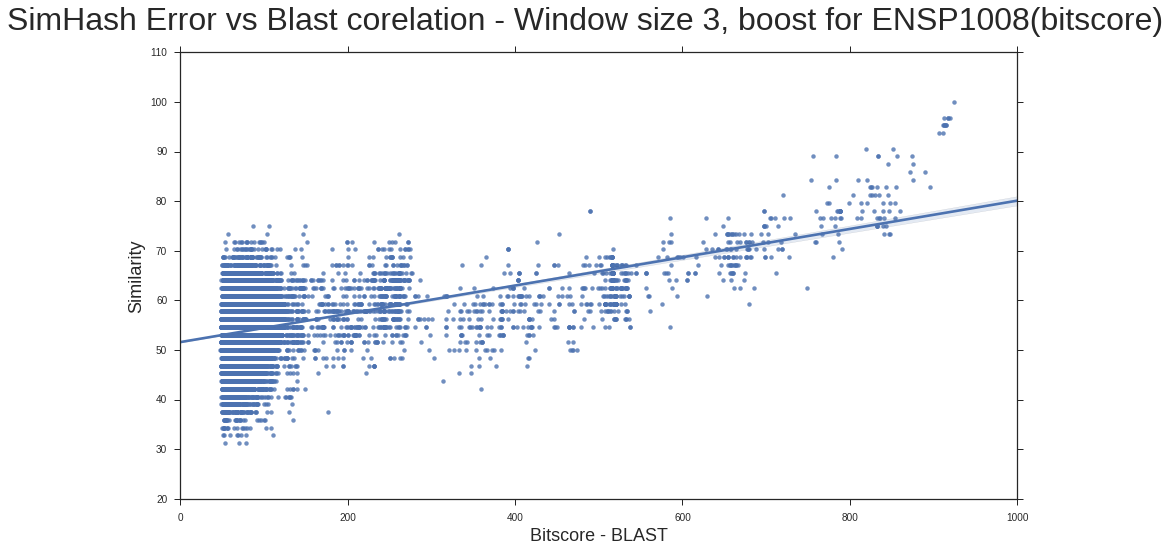

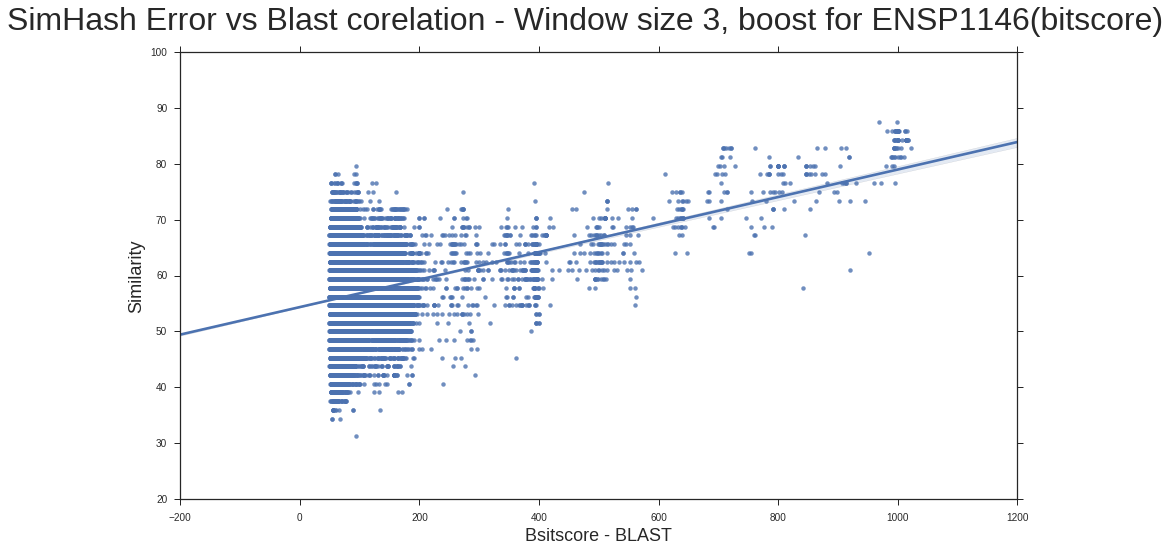

In [23]:
plt.figure(figsize=(15,8))
sns.regplot(x="bitscore", y="similarity",data=simhash_ENSP233_boost_3)
plt.xlabel('Bitscore - BLAST', fontsize=18)
plt.ylabel('Similarity', fontsize=18)
plt.suptitle("SimHash Error vs Blast corelation - Window size 3, boost for ENSP233(bitscore)", fontsize = 32)
plt.savefig("SimHash Error vs Blast corelation - Window size 3, boost for ENSP233(bitscore).png")

plt.figure(figsize=(15,8))
sns.regplot(x="bitscore", y="similarity",data=simhash_ENSP1008_boost_3)
plt.xlabel('Bitscore - BLAST', fontsize=18)
plt.ylabel('Similarity', fontsize=18)
plt.suptitle("SimHash Error vs Blast corelation - Window size 3, boost for ENSP1008(bitscore)", fontsize = 32)
plt.savefig("SimHash Error vs Blast corelation - Window size 3, boost for ENSP1008(bitscore).png")

plt.figure(figsize=(15,8))
sns.regplot(x="bitscore", y="similarity",data=simhash_ENSP1146_boost_3)
plt.xlabel('Bsitscore - BLAST', fontsize=18)
plt.ylabel('Similarity', fontsize=18)
plt.suptitle("SimHash Error vs Blast corelation - Window size 3, boost for ENSP1146(bitscore)", fontsize = 32)
plt.savefig("SimHash Error vs Blast corelation - Window size 3, boost for ENSP1146(bitscore).png")

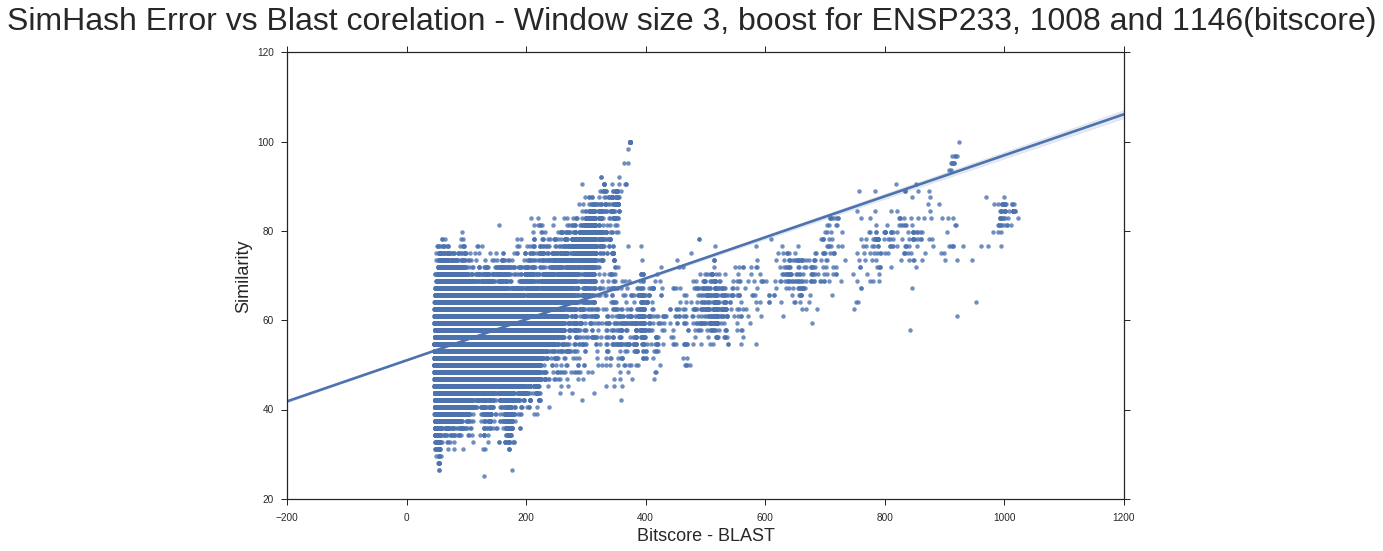

In [24]:
plt.figure(figsize=(15,8))
sns.regplot(x="bitscore", y="similarity",data=simhash_all_boost_3)
plt.xlabel('Bitscore - BLAST', fontsize=18)
plt.ylabel('Similarity', fontsize=18)
plt.suptitle("SimHash Error vs Blast corelation - Window size 3, boost for ENSP233, 1008 and 1146(bitscore)", fontsize = 32)
plt.savefig("SimHash Error vs Blast corelation - Window size 3, boost for ENSP233, 1008 and 1146(bitscore).png")

# Corelation - eValue, no BLOSUM

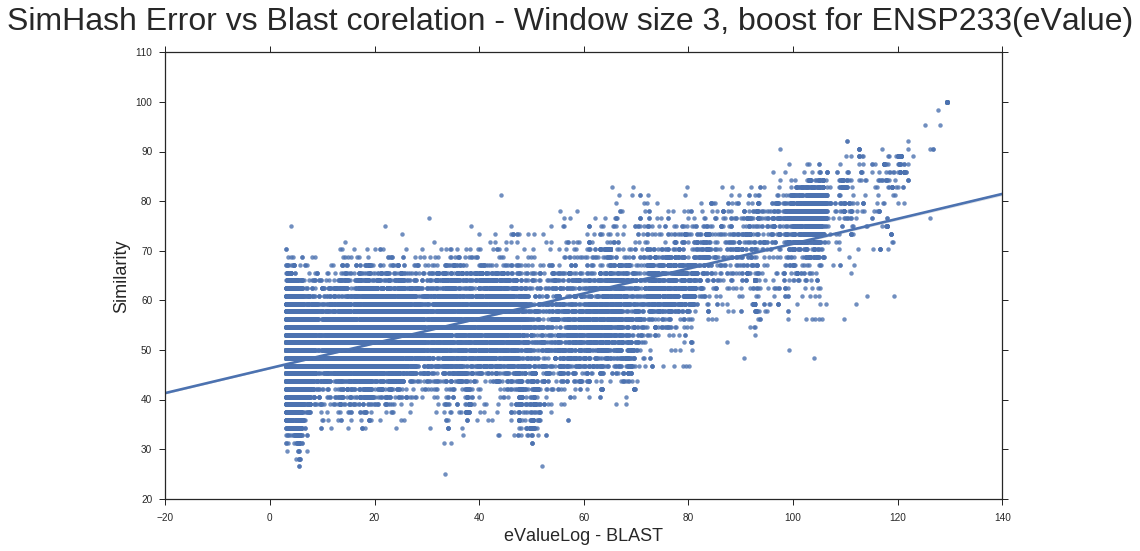

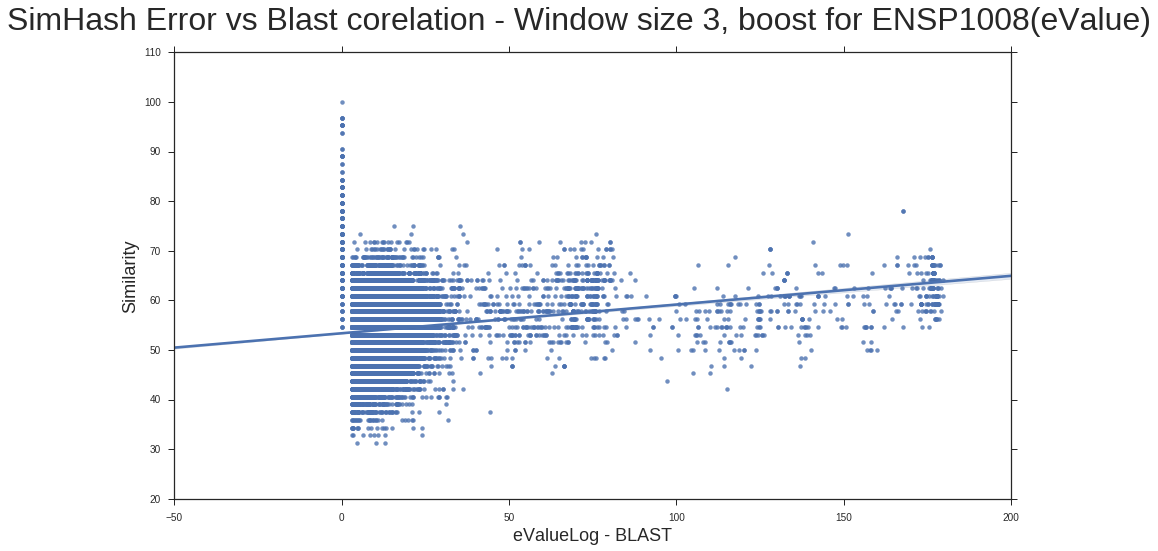

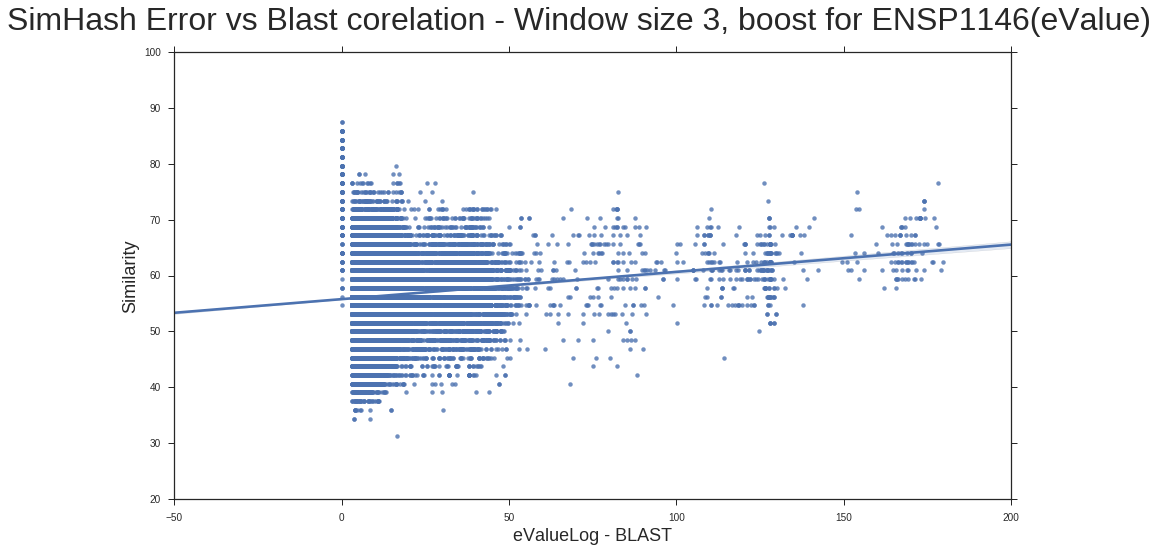

In [25]:
plt.figure(figsize=(15,8))
sns.regplot(x="eValueLog", y="similarity",data=simhash_ENSP233_boost_3)
plt.xlabel('eValueLog - BLAST', fontsize=18)
plt.ylabel('Similarity', fontsize=18)
plt.suptitle("SimHash Error vs Blast corelation - Window size 3, boost for ENSP233(eValue)", fontsize = 32)
plt.savefig("SimHash Error vs Blast corelation - Window size 3, boost for ENSP233(eValue).png")

plt.figure(figsize=(15,8))
sns.regplot(x="eValueLog", y="similarity",data=simhash_ENSP1008_boost_3)
plt.xlabel('eValueLog - BLAST', fontsize=18)
plt.ylabel('Similarity', fontsize=18)
plt.suptitle("SimHash Error vs Blast corelation - Window size 3, boost for ENSP1008(eValue)", fontsize = 32)
plt.savefig("SimHash Error vs Blast corelation - Window size 3, boost for ENSP1008(eValue).png")

plt.figure(figsize=(15,8))
sns.regplot(x="eValueLog", y="similarity",data=simhash_ENSP1146_boost_3)
plt.xlabel('eValueLog - BLAST', fontsize=18)
plt.ylabel('Similarity', fontsize=18)
plt.suptitle("SimHash Error vs Blast corelation - Window size 3, boost for ENSP1146(eValue)", fontsize = 32)
plt.savefig("SimHash Error vs Blast corelation - Window size 3, boost for ENSP1146(eValue).png")

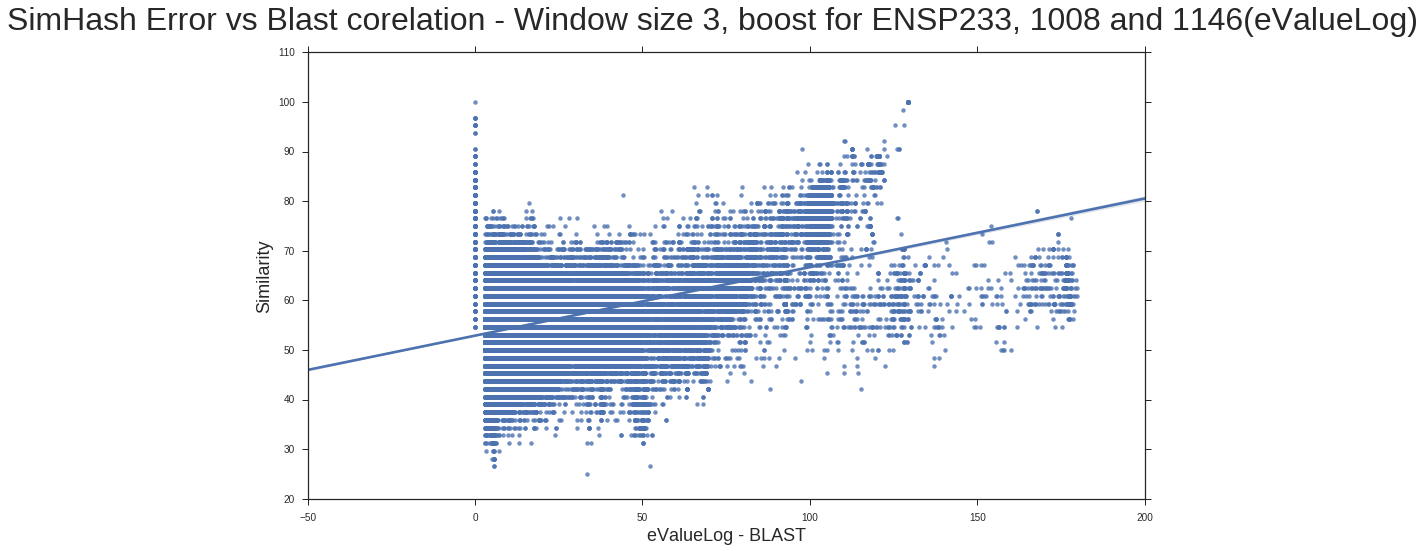

In [26]:
plt.figure(figsize=(15,8))
sns.regplot(x="eValueLog", y="similarity",data=simhash_all_boost_3)
plt.xlabel('eValueLog - BLAST', fontsize=18)
plt.ylabel('Similarity', fontsize=18)
plt.suptitle("SimHash Error vs Blast corelation - Window size 3, boost for ENSP233, 1008 and 1146(eValueLog)", fontsize = 32)
plt.savefig("SimHash Error vs Blast corelation - Window size 3, boost for ENSP233, 1008 and 1146(eValueLog).png")

# Corelation - eValue, with BLOSUM